In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# Load the dataset
data = pd.read_csv(r'C:\Users\ADMIN\Desktop\flip\avocado.csv')
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


The data has 18249 rows × 14 columns

In [3]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
data.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [6]:
data.shape

(18249, 14)

data has 18249 rows and 14 columns out of which 1 is target and remaining are independent variable

In [11]:
data.columns
data.columns.tolist()

['Unnamed: 0',
 'Date',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region']

In [13]:
data.type

0        conventional
1        conventional
2        conventional
3        conventional
4        conventional
             ...     
18244         organic
18245         organic
18246         organic
18247         organic
18248         organic
Name: type, Length: 18249, dtype: object

Data type is object,int64 and float

In [14]:
#checking the null values
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There area no null values in the data frame

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


<AxesSubplot:>

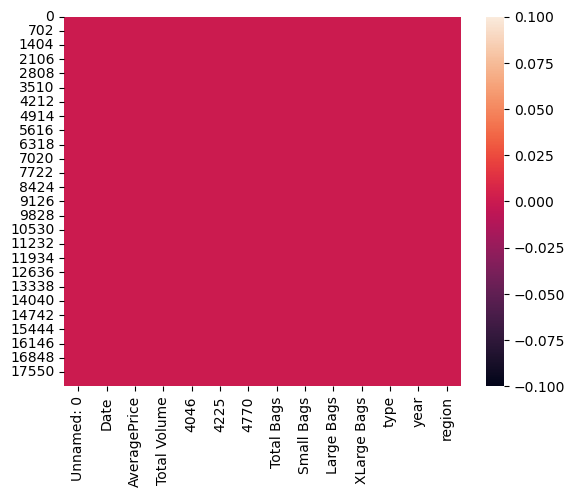

In [10]:
import seaborn as sns
sns.heatmap(data.isnull())

In [ ]:
As there is single colour so there is no null values as seen above also

In [4]:
# to check unique vqlues
data['AveragePrice'].unique()


array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

In [5]:
data['AveragePrice'].nunique()# number of unique values


259

In [6]:
data['Date'].nunique()# number of unique values


169

In [7]:
data['type'].nunique()# number of unique values

2

In [8]:
for i in data.columns:
    print(data[i].value_counts())
    print("\n")
    

0     432
7     432
1     432
11    432
9     432
8     432
10    432
6     432
5     432
4     432
3     432
2     432
41    324
34    324
35    324
36    324
37    324
38    324
39    324
40    324
47    324
42    324
43    324
44    324
45    324
46    324
32    324
48    324
49    324
50    324
33    324
26    324
31    324
30    324
12    324
13    324
14    324
15    324
16    324
17    324
18    324
19    324
20    324
21    324
22    324
23    324
24    324
25    324
27    324
28    324
29    324
51    322
52    107
Name: Unnamed: 0, dtype: int64


2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64


1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


4103.97       2
352

In [60]:
data["AveragePrice"].unique()
data.shape[0]


18249

In [61]:
data.loc[data["AveragePrice"]==" "]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


<AxesSubplot:>

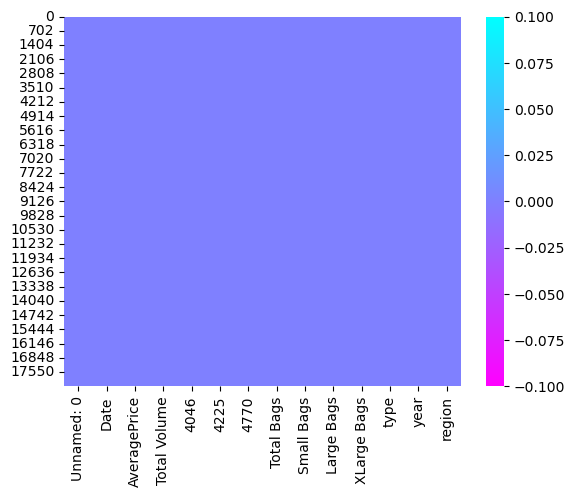

In [11]:
sns.heatmap(data.isnull(),cmap="cool_r")

In [12]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [13]:
#checking the unique values in each column
data.nunique().to_frame("No.of unique value")

,No.of unique value
Unnamed: 0,53
Date,169
AveragePrice,259
Total Volume,18237
4046,17702
4225,18103
4770,12071
Total Bags,18097
Small Bags,17321
Large Bags,15082


In [14]:
numerical_columns = data.select_dtypes(include="number").columns
print(numerical_columns)


Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year'],
      dtype='object')


In [15]:
categorical_colm = []
for i in data.columns:
    if data[i].dtype == "object":
        categorical_colm.append(i)

print("Categorical columns:", categorical_colm)


Categorical columns: ['Date', 'type', 'region']


 data visualization

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


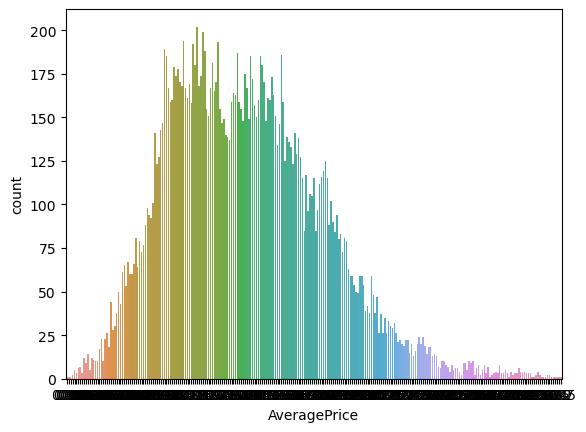

In [16]:

import seaborn as sns

if data["AveragePrice"].notnull().any():
    sns.countplot(x='AveragePrice', data=data)
    print(data["AveragePrice"].value_counts())
else:
    print("The 'AveragePrice' column does not contain any non-null values.")



C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

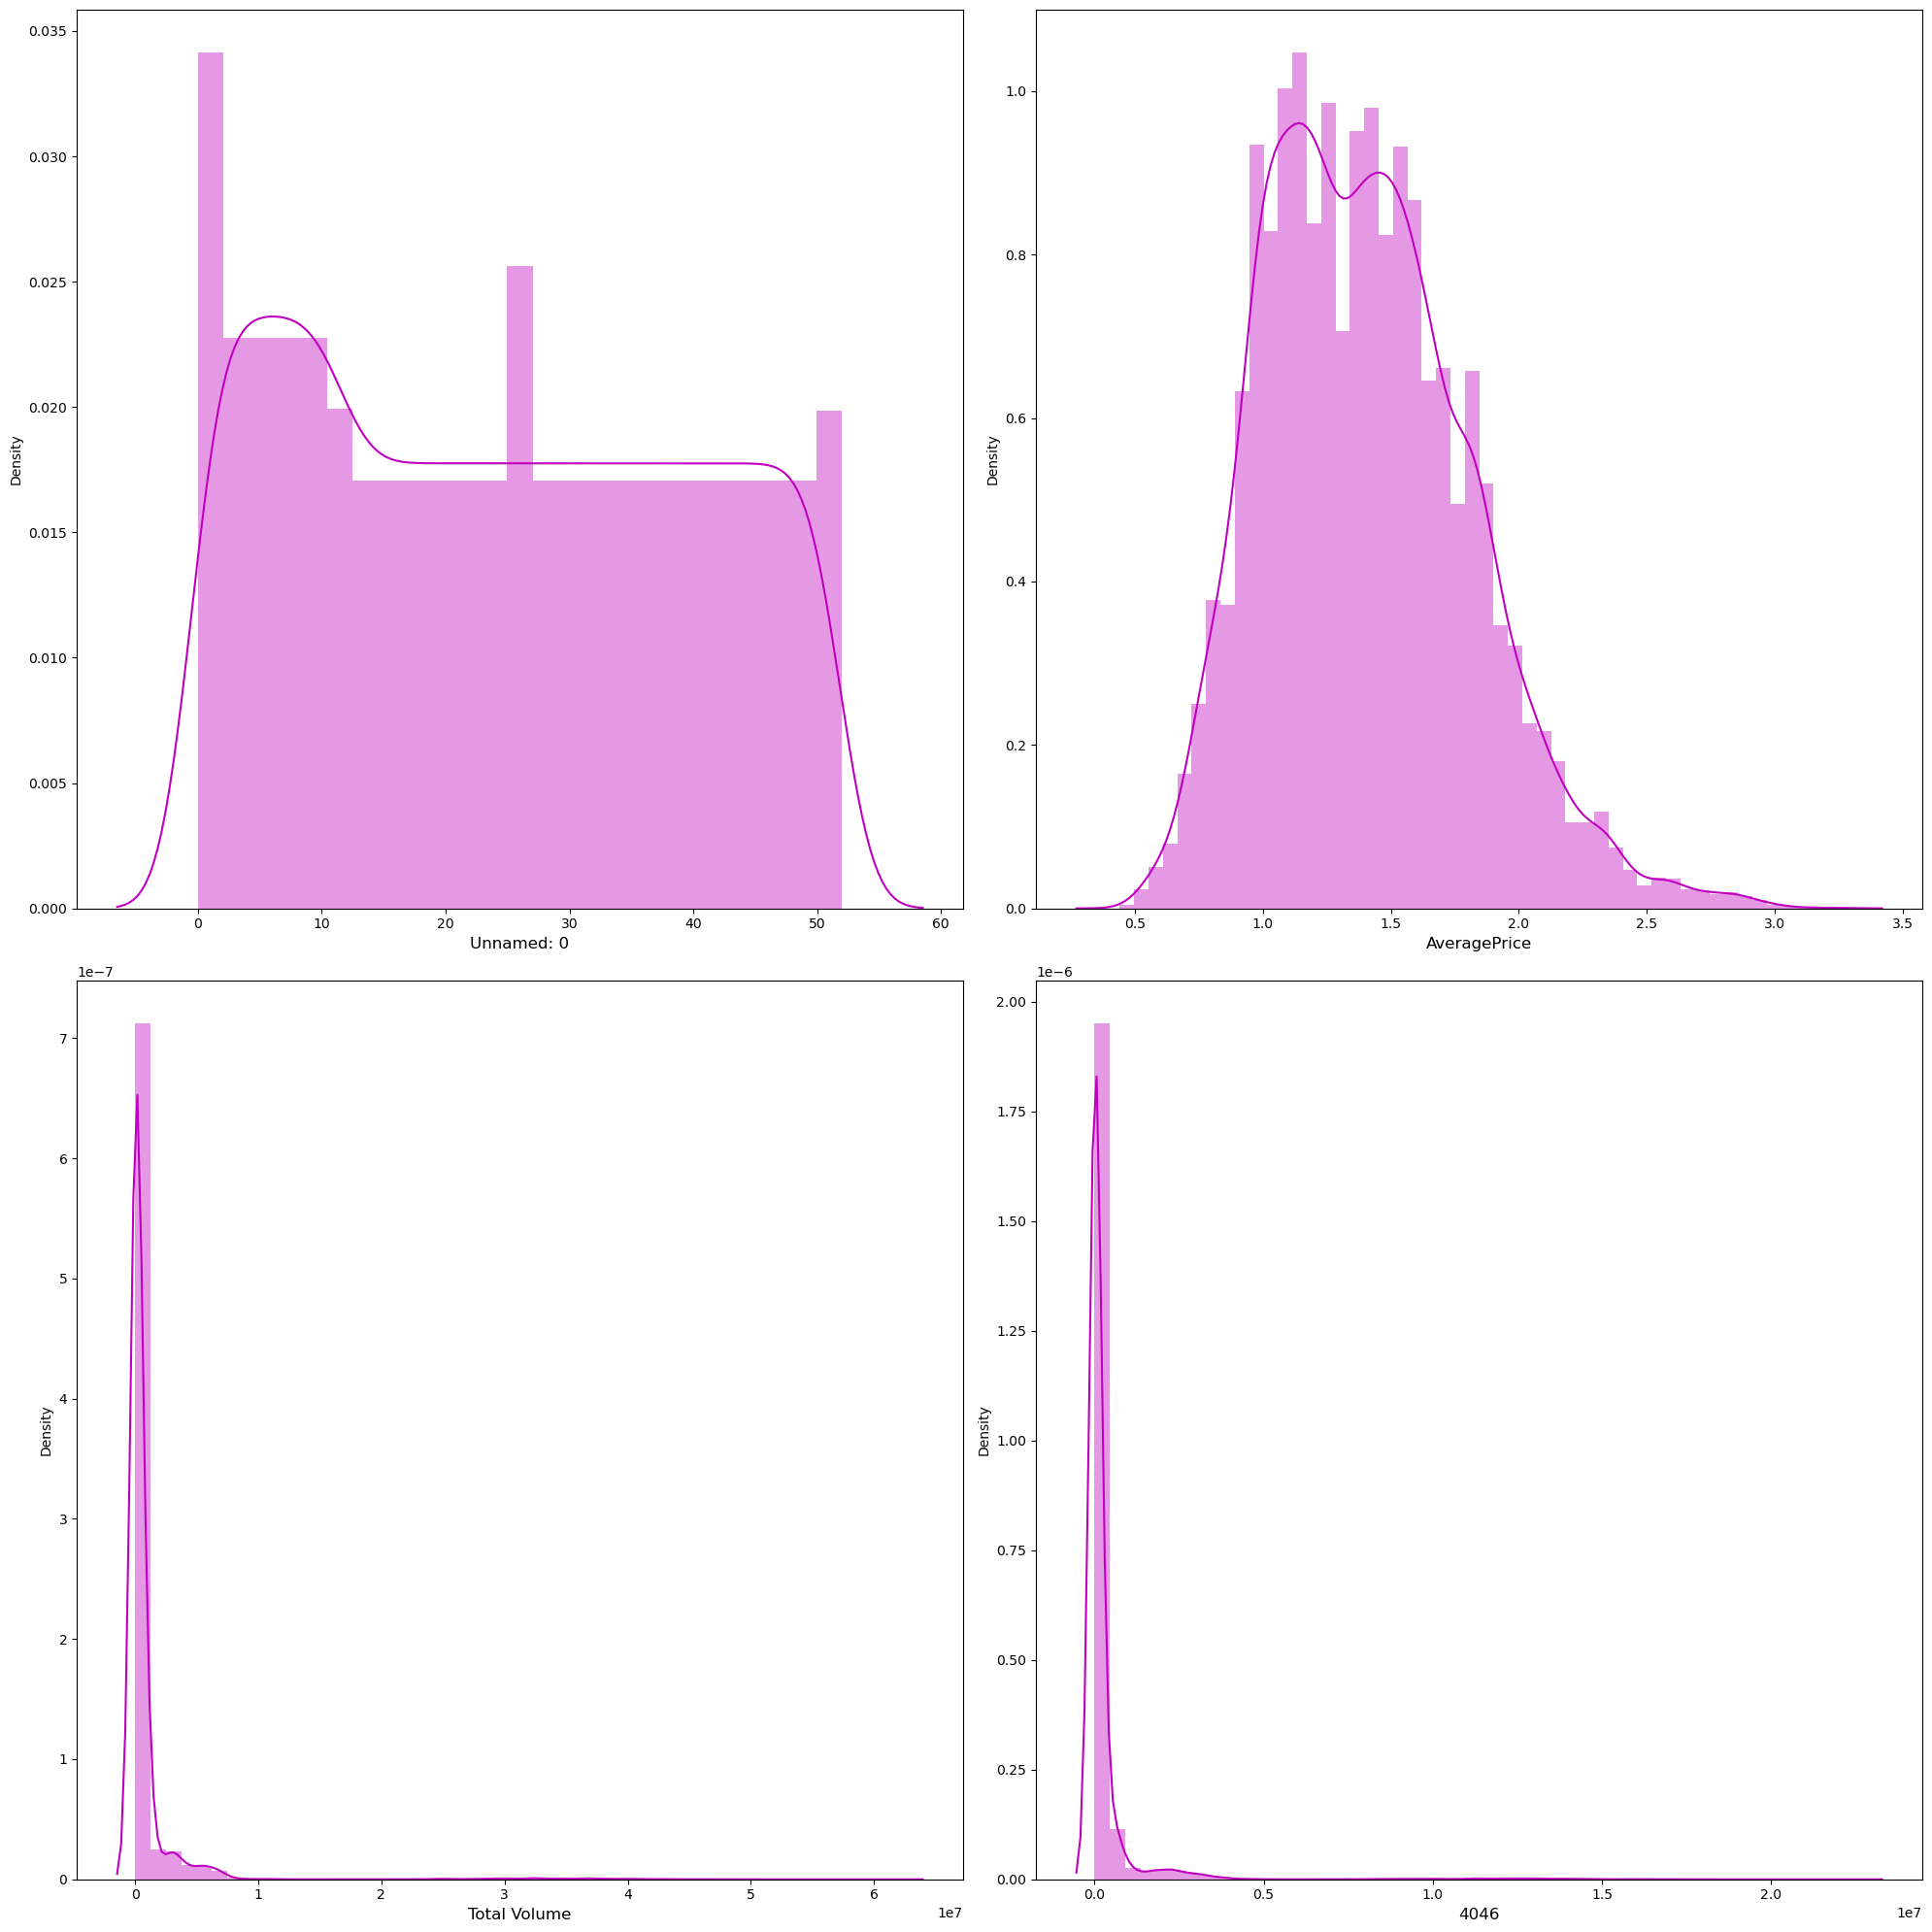

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20), facecolor="white")
plotnumber = 1
#numerical_columns = ['column1', 'column2', 'column3', 'column4']  # Replace with your actual numerical column names

for column in numerical_columns:
    if plotnumber <= 4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.distplot(data[column], color="m")
        plt.xlabel(column, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber += 1

plt.tight_layout()
plt.show()


total volume and 4046 are skewed to right

KeyboardInterrupt: 

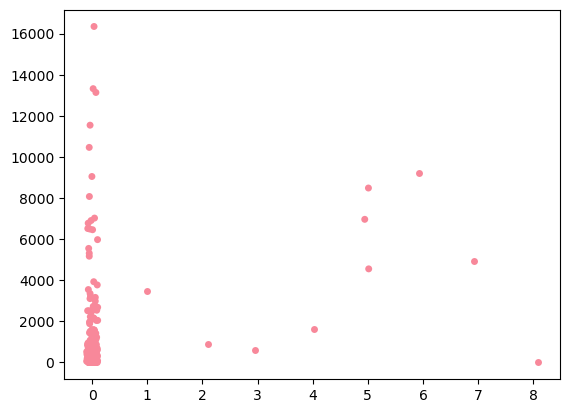

In [19]:
import seaborn as sns
sns.stripplot(x='Small Bags', y="Large Bags",data=data)
plt.show()

KeyboardInterrupt: 

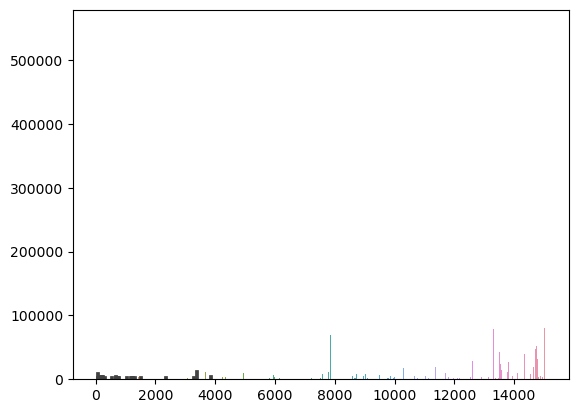

In [21]:
import seaborn as sns
sns.barplot(x='Large Bags', y="XLarge Bags",data=data)
plt.show()

In [ ]:
sns.scatterplot(x='AveragePrice', y="Total Volume",data=data)
plt.show()

In [ ]:
sns.stripplot(x='4046', y="4225",data=data)
plt.show()

In [ ]:
sns.stripplot(x='4225', y="4770",data=data)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='Total Volume', y='AveragePrice', data=data)
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='4770', y='AveragePrice', data=data)
plt.show()


In [ ]:
sns.catplot(x='4225', y='AveragePrice', data=data)
plt.show()

In [ ]:
sns.catplot(x='Total Volume', y='AveragePrice', data=data)
plt.show()

Multivariate Analysis

In [22]:
sns.pairplot(data.hue=='AveragePrice', palette=="Dark2")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'hue'

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\si

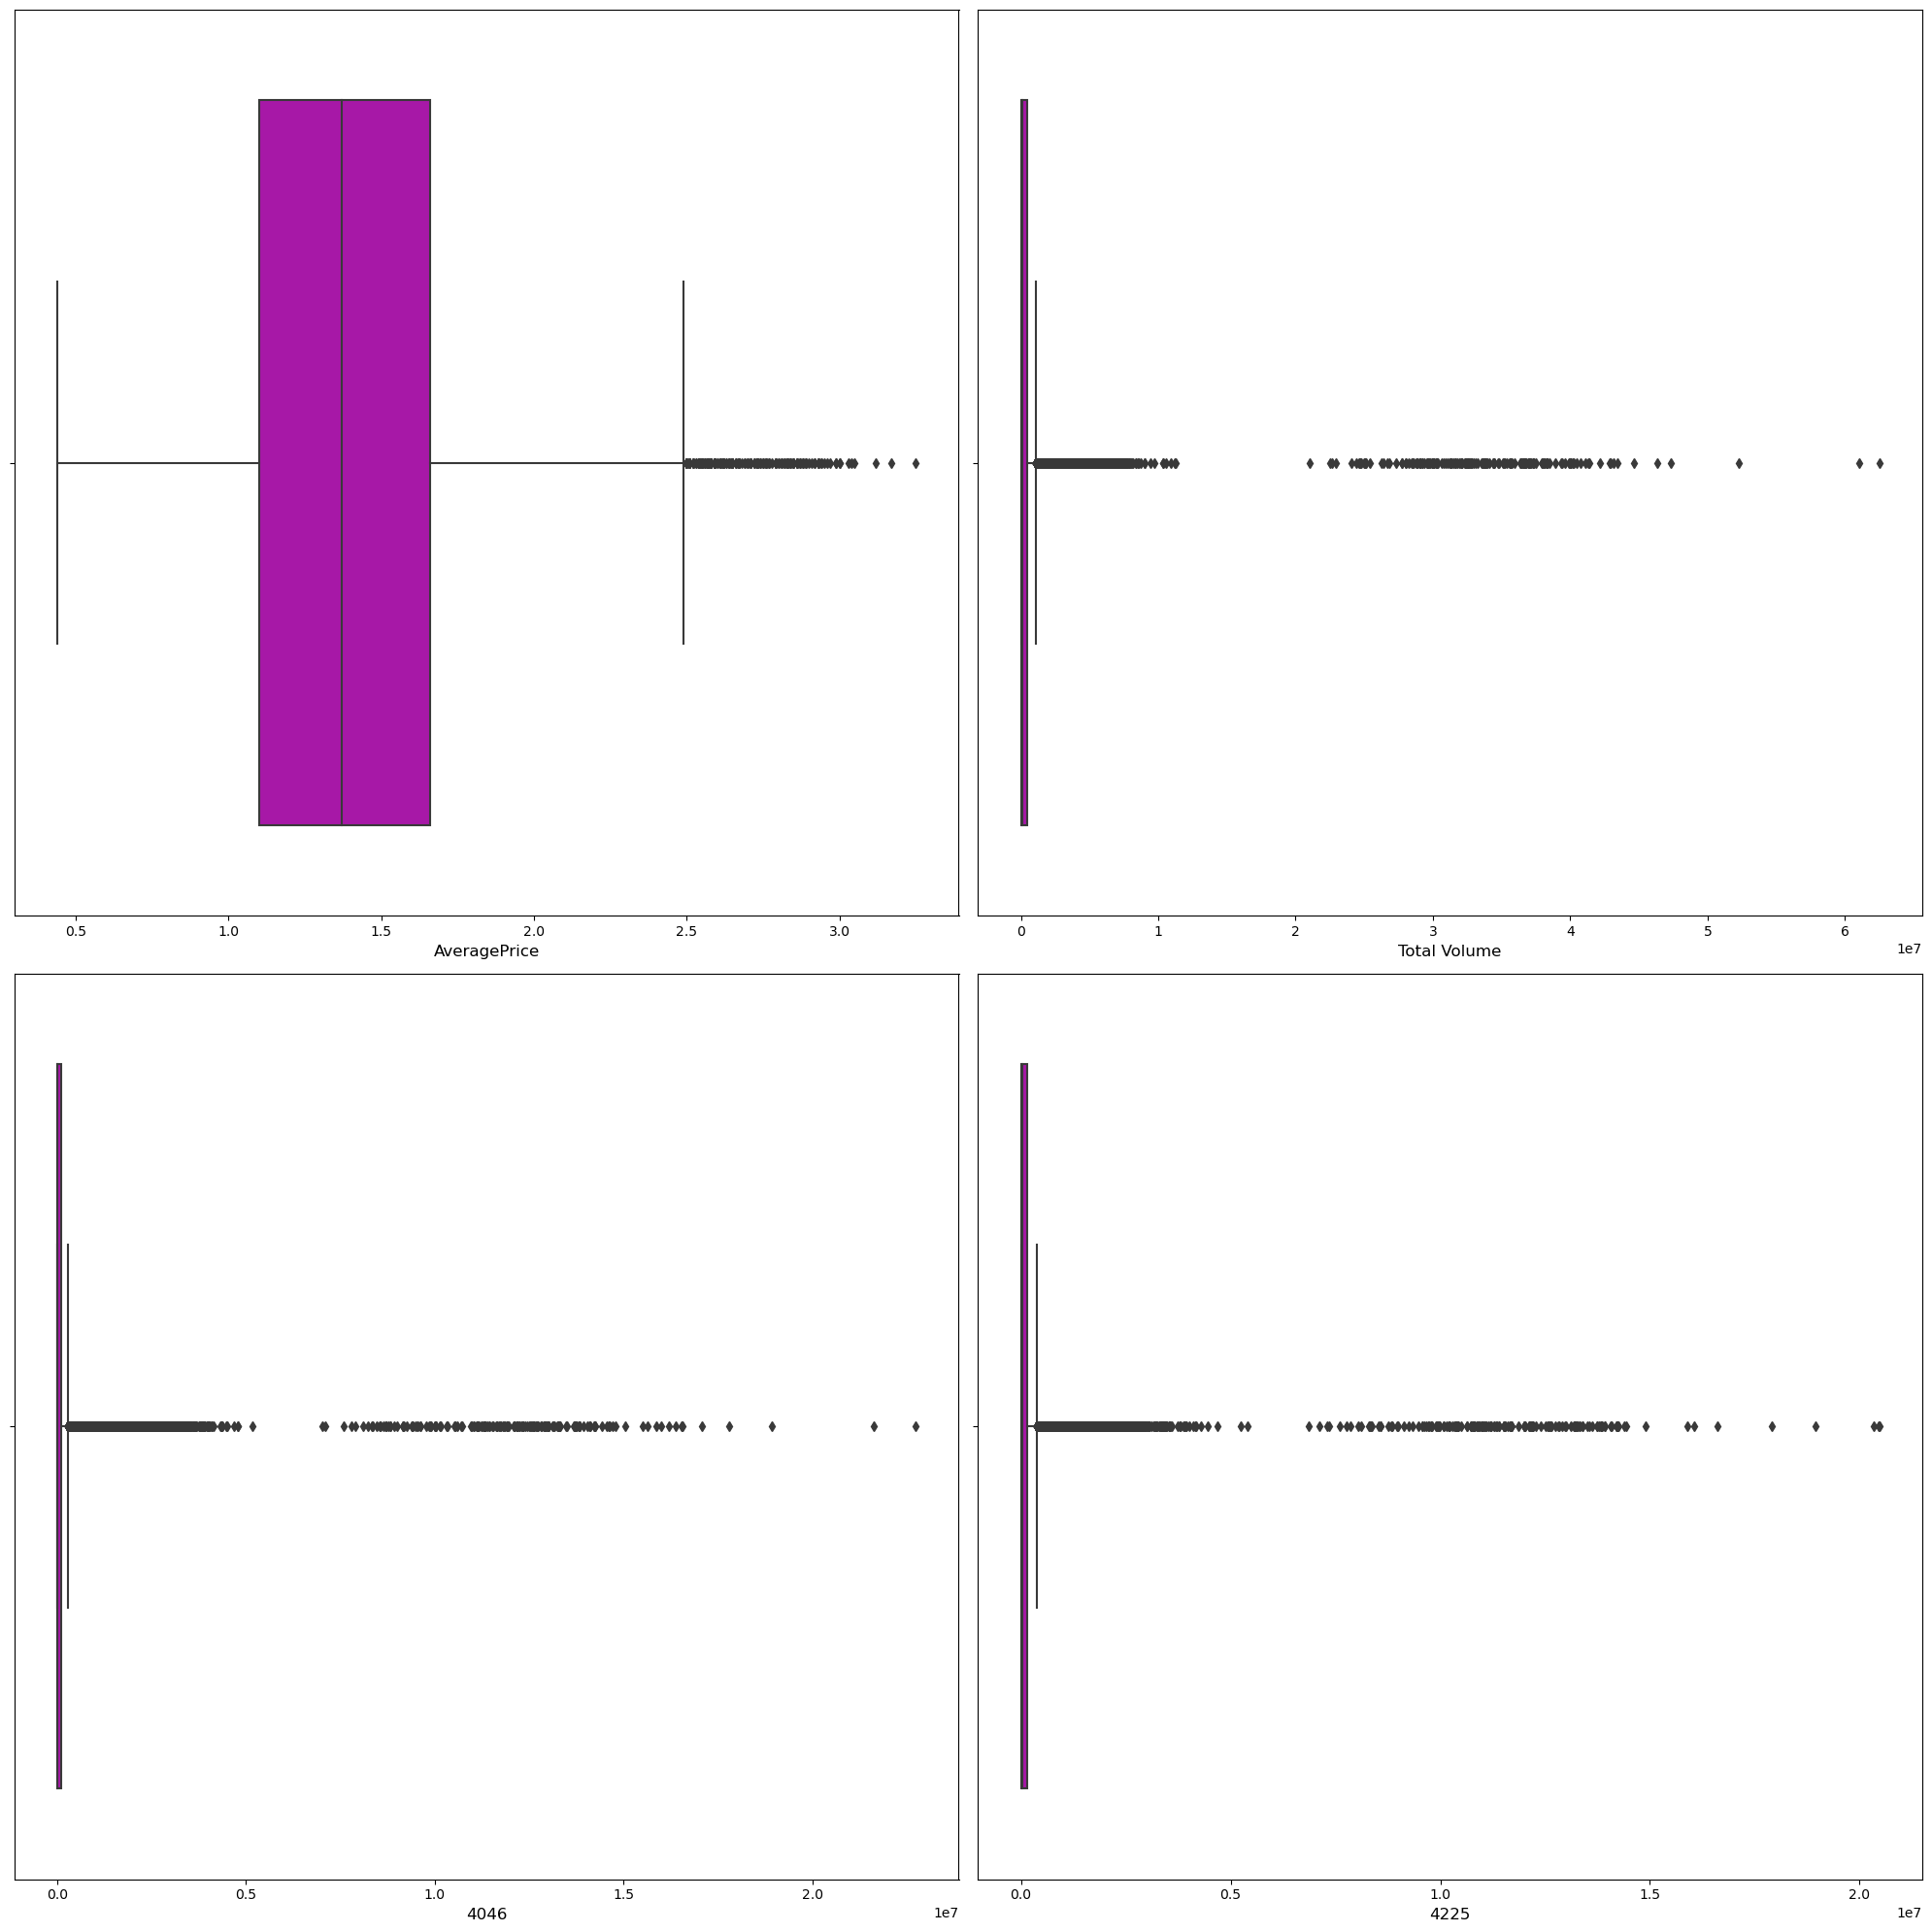

In [23]:
# Checking for outliners using box plot
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20), facecolor="white")
plotnumber = 1
numerical_columns = ['AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year'] # Replace with your actual numerical column names

for column in numerical_columns:
    if plotnumber <= 4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.boxplot(data[column], color="m")
        plt.xlabel(column, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber+= 1

plt.tight_layout()
plt.show()

In [27]:
import numpy as np
from scipy.stats import zscore
out_feature=data[['Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags','year']]
z=np.abs(zscore(out_feature))
z

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558,1.221282
1,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558,1.221282
2,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558,1.221282
3,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558,1.221282
4,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558,1.221282
...,...,...,...,...,...,...,...,...,...
18244,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558,1.970504
18245,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558,1.970504
18246,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558,1.970504
18247,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558,1.970504


In [28]:
np.where(z>3)

(array([ 346,  359,  780, ..., 9111, 9112, 9113], dtype=int64),
 array([1, 1, 7, ..., 6, 6, 6], dtype=int64))

In [29]:
z.iloc[346,1]

3.199410614794124

In [31]:
#removing the data above z score and ceating new data frame
data1=data[(z<3).all(axis=1)]
data1.shape

(17782, 14)

In [34]:
print("data loss percentage:-",((data.shape[0])-data1.shape[0])/100)

data loss percentage:- 4.67


In [35]:
data.skew()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4220\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

In [36]:
import numpy as np
data['Total Volume'] = np.cbrt(data['Total Volume'])

data['4770'] = np.cbrt(data['4770'])
data['4225'] = np.cbrt(data['4225'])
data['XLarge Bags'] = np.cbrt(data['XLarge Bags'])
data['Large Bags'] = np.cbrt(data['Large Bags'])
data['Total Bags'] = np.cbrt(data['Total Bags'])

data['Small Bags'] = np.cbrt(data['Small Bags'])

In [31]:
data.skew()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11848\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


Unnamed: 0      0.108334
AveragePrice    0.580303
Total Volume    0.252228
4046            2.277861
4225            0.248376
4770           -0.864933
Total Bags      2.302176
Small Bags     -3.953159
Large Bags     -1.865411
XLarge Bags     0.681631
year            0.215339
dtype: float64

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


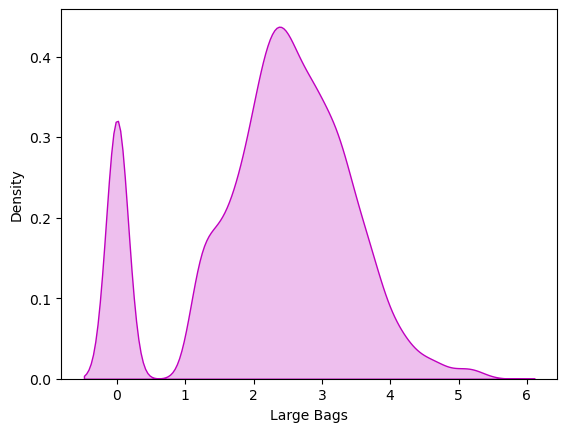

In [28]:
sns.distplot(data["Large Bags"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


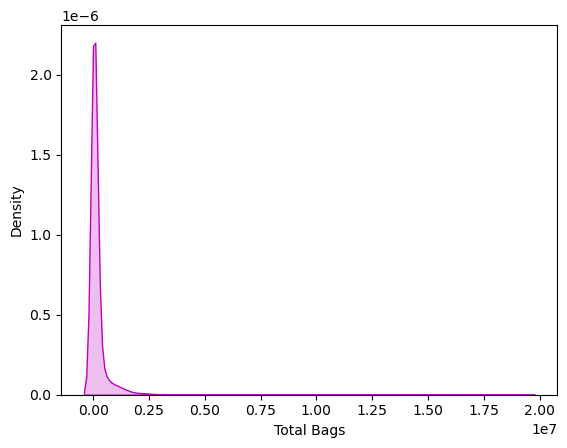

In [29]:
sns.distplot(data["Total Bags"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


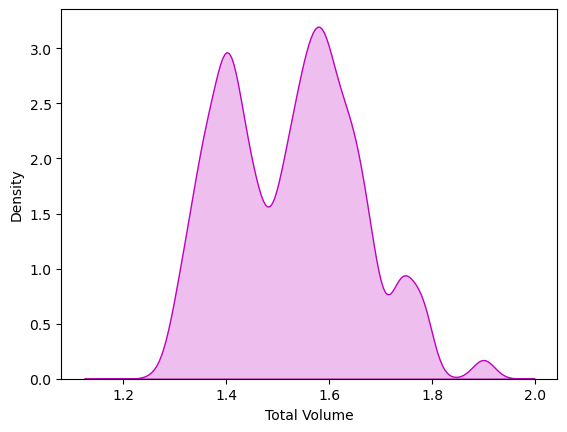

In [32]:
sns.distplot(data["Total Volume"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()

looks normal almost

Encoding Categorical Columns

In [37]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in data1.columns:
    if data1[i].dtypes=="object":
        data1[i]=OE.fit_transform(data1[i].values.reshape(-1,1))
data

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4220\47946823.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[i]=OE.fit_transform(data1[i].values.reshape(-1,1))
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4220\47946823.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[i]=OE.fit_transform(data1[i].values.reshape(-1,1))
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4220\47946823.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,40.049235,1036.74,37.903460,3.638275,20.564634,20.490870,4.534711,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,38.001150,674.28,35.473513,3.878204,21.183249,21.110581,4.602425,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,49.079175,794.70,47.790416,5.072283,20.120399,20.035113,4.689671,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,42.906983,1132.00,41.597133,4.171309,17.978534,17.839520,5.114173,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,37.093893,941.48,35.260208,4.231732,18.355039,18.157325,5.825433,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,25.750488,2046.96,11.520945,0.000000,23.810234,23.553564,7.558651,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,24.037003,1191.70,15.083241,0.000000,21.002902,20.754542,6.873934,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,23.966829,1191.92,13.486113,8.995636,21.100134,21.068409,3.484558,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,25.305697,1527.63,14.392048,8.991803,22.219254,22.185443,3.684031,0.0,organic,2018,WestTexNewMexico


In [38]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17782 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    17782 non-null  int64  
 1   Date          17782 non-null  float64
 2   AveragePrice  17782 non-null  float64
 3   Total Volume  17782 non-null  float64
 4   4046          17782 non-null  float64
 5   4225          17782 non-null  float64
 6   4770          17782 non-null  float64
 7   Total Bags    17782 non-null  float64
 8   Small Bags    17782 non-null  float64
 9   Large Bags    17782 non-null  float64
 10  XLarge Bags   17782 non-null  float64
 11  type          17782 non-null  float64
 12  year          17782 non-null  int64  
 13  region        17782 non-null  float64
dtypes: float64(12), int64(2)
memory usage: 2.0 MB


In [39]:
data1.describe()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,17782.000000,17782.000000,17782.000000,1.778200e+04,1.778200e+04,1.778200e+04,17782.000000,1.778200e+04,1.778200e+04,17782.000000,17782.000000,17782.000000,17782.000000,17782.000000
mean,24.207345,83.719492,1.415546,4.579126e+05,1.535177e+05,1.644240e+05,11078.541716,1.288903e+05,9.990217e+04,27640.732102,1347.377066,0.513047,2016.141098,26.161624
std,15.480458,48.816121,0.402278,1.009722e+06,4.381507e+05,3.978660e+05,34373.958145,2.812726e+05,2.288217e+05,72791.402335,5222.289928,0.499844,0.939273,15.402194
min,0.000000,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2015.000000,0.000000
25%,10.000000,41.000000,1.110000,1.048145e+04,8.043150e+02,2.877773e+03,0.000000,4.846455e+03,2.636443e+03,109.015000,0.000000,0.000000,2015.000000,13.000000
50%,24.000000,84.000000,1.380000,9.796080e+04,7.514895e+03,2.603862e+04,158.285000,3.671581e+04,2.395354e+04,2402.420000,0.000000,1.000000,2016.000000,26.000000
75%,38.000000,126.000000,1.670000,3.852980e+05,9.713905e+04,1.271795e+05,5175.322500,1.012714e+05,7.780317e+04,18809.847500,70.292500,1.000000,2017.000000,39.000000
max,52.000000,168.000000,3.250000,8.362504e+06,4.085859e+06,3.894802e+06,344488.510000,2.782725e+06,2.348868e+06,781447.290000,55940.330000,1.000000,2018.000000,53.000000


CORRELATION BETWEEN TARGET VARIABLE AND INDEPENDENT VARIABLE

In [40]:
corr=data1.corr()
corr

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Unnamed: 0,1.000000,-0.419470,-0.131275,0.018629,0.020345,0.030596,0.053554,-0.014636,-0.009752,-0.025043,-0.011944,0.001355,-0.170120,-0.003042
Date,-0.419470,1.000000,0.150661,-0.013131,-0.041619,-0.048814,-0.092352,0.098018,0.080639,0.117499,0.108188,0.005776,0.950179,-0.002925
AveragePrice,-0.131275,0.150661,1.000000,-0.328226,-0.327348,-0.243080,-0.240676,-0.295100,-0.274138,-0.267604,-0.152351,0.608447,0.099910,0.010428
Total Volume,0.018629,-0.013131,-0.328226,1.000000,0.876417,0.871754,0.647854,0.912311,0.905779,0.641029,0.514086,-0.416905,-0.006465,0.074648
4046,0.020345,-0.041619,-0.327348,0.876417,1.000000,0.565557,0.492545,0.728264,0.707104,0.561448,0.415807,-0.342523,-0.035792,0.117225
4225,0.030596,-0.048814,-0.243080,0.871754,0.565557,1.000000,0.620568,0.758097,0.779038,0.452271,0.392463,-0.384443,-0.041588,0.009466
4770,0.053554,-0.092352,-0.240676,0.647854,0.492545,0.620568,1.000000,0.558417,0.571925,0.324308,0.496278,-0.322876,-0.082975,-0.096766
Total Bags,-0.014636,0.098018,-0.295100,0.912311,0.728264,0.758097,0.558417,1.000000,0.978241,0.747210,0.581969,-0.379801,0.101506,0.083800
Small Bags,-0.009752,0.080639,-0.274138,0.905779,0.707104,0.779038,0.571925,0.978241,1.000000,0.593587,0.597964,-0.369139,0.084803,0.064024
Large Bags,-0.025043,0.117499,-0.267604,0.641029,0.561448,0.452271,0.324308,0.747210,0.593587,1.000000,0.297323,-0.288204,0.117975,0.125787


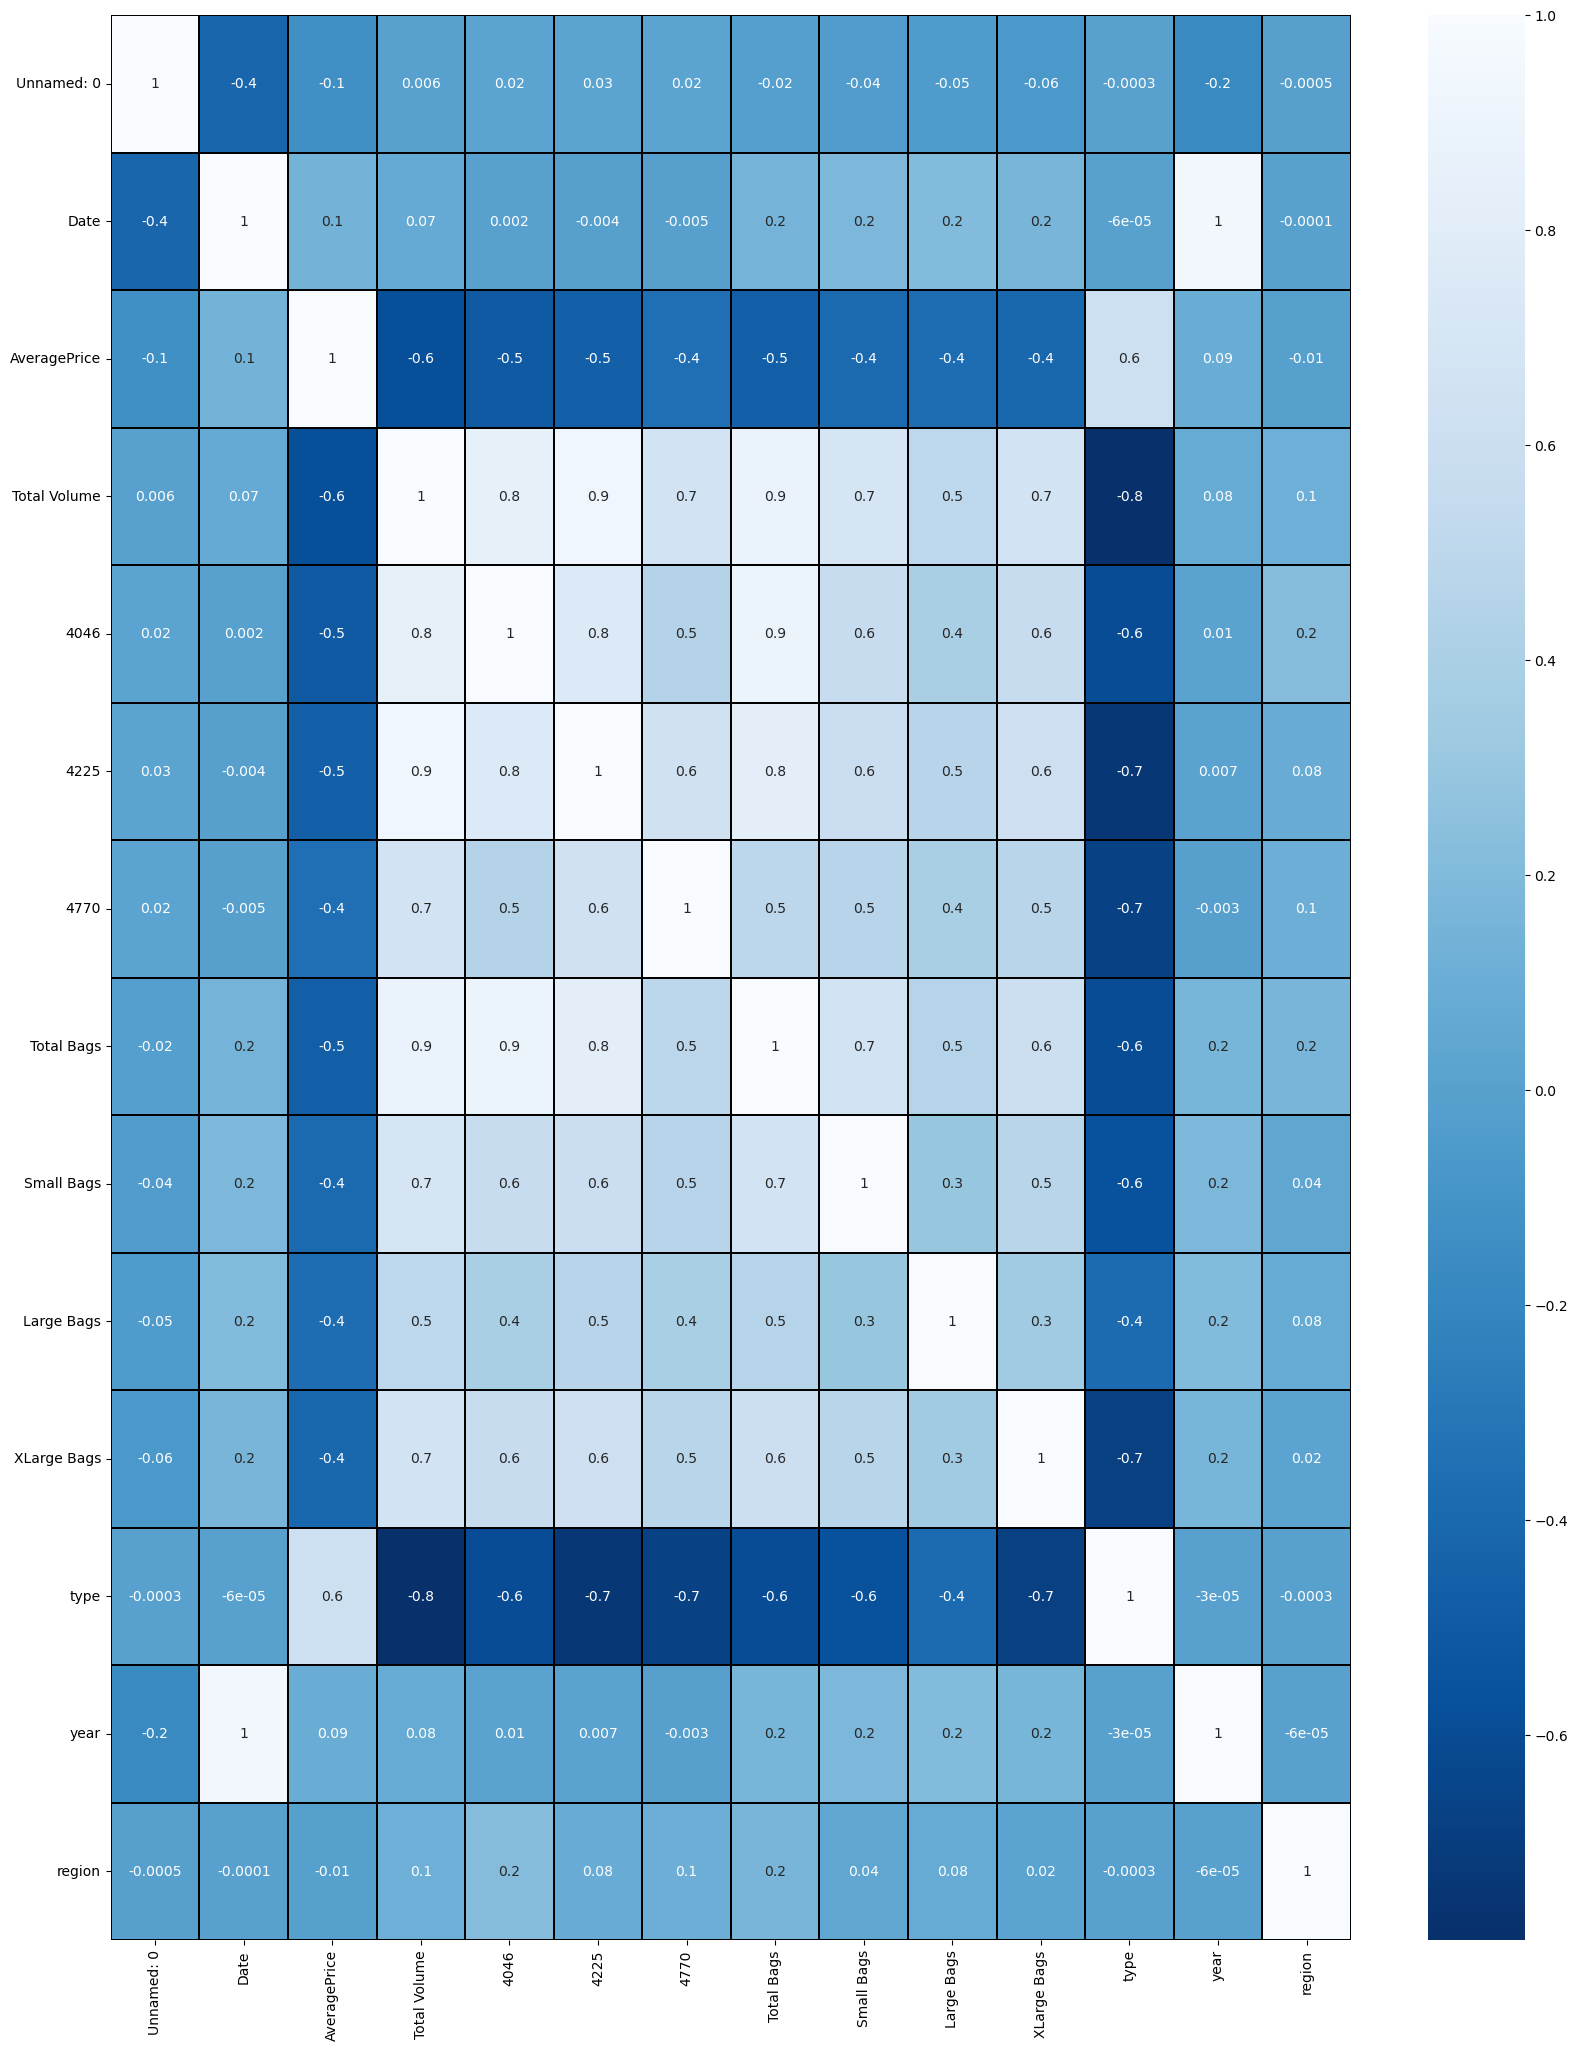

In [40]:
plt.figure(figsize=(20,25))
sns.heatmap(data.corr(),linewidth=0.1,fmt="0.1g",linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0)
plt.show()

HEAT MAP CONSISTS OF BOTH POSITIVE AND NEGATIVE CORELATION. tOTAL VOLUME AND 4225 AND LARGE BAG HAVE POSITIVE CORELATION WITH TARGET. tYPE HAS HIGH CORELATION. 

In [41]:
corr["AveragePrice"].sort_values(ascending=False)

region          1.000000
4046            0.218500
Total Bags      0.165688
Total Volume    0.116331
4770            0.105107
4225            0.084083
Large Bags      0.076606
Small Bags      0.038307
XLarge Bags     0.015814
year           -0.000055
Date           -0.000101
type           -0.000280
Unnamed: 0     -0.000489
AveragePrice   -0.011716
Name: region, dtype: float64

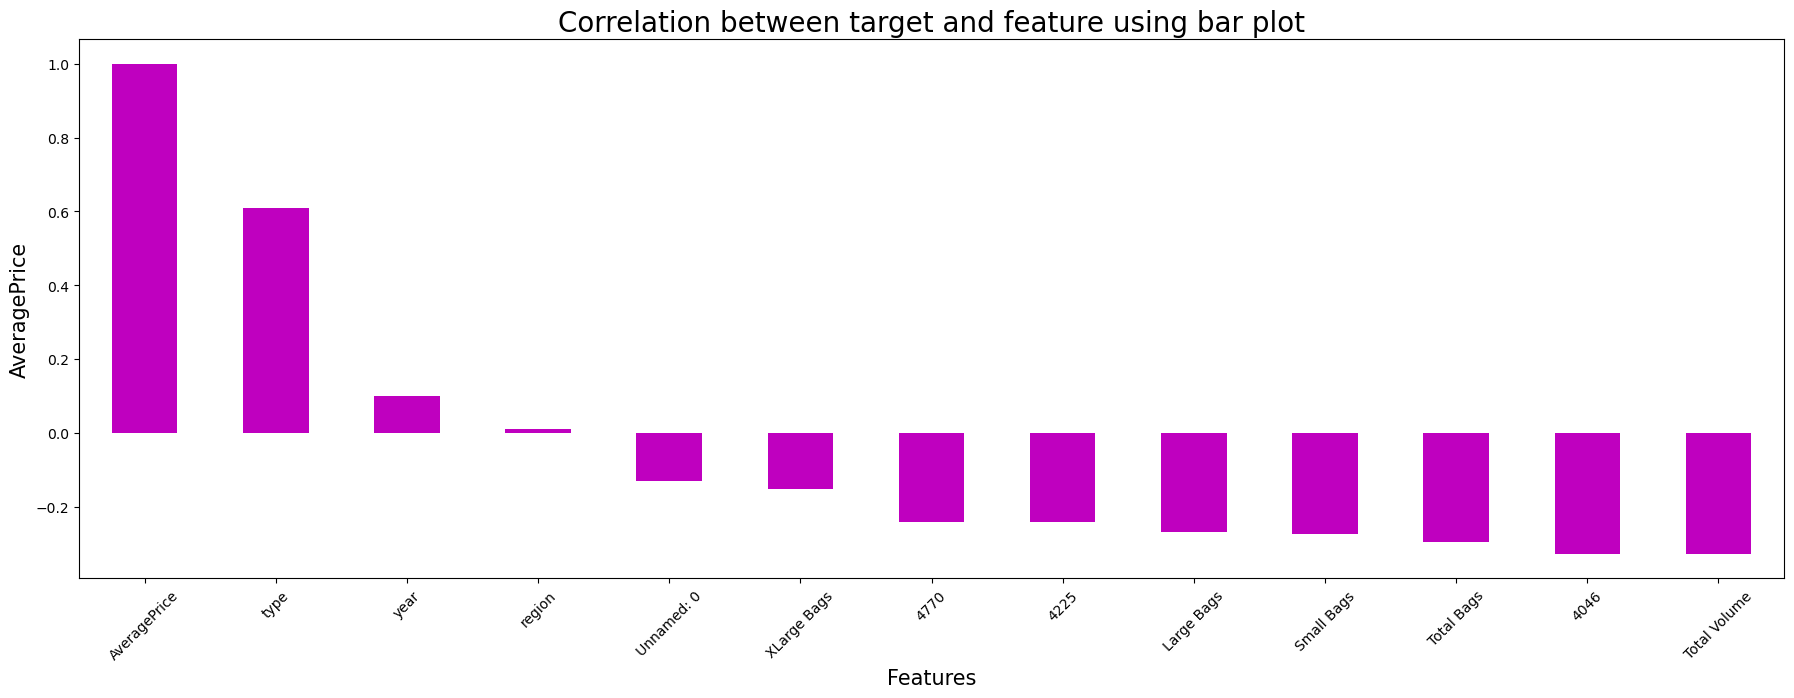

In [41]:
plt.figure(figsize=(22,7), facecolor="white")
data1.corr()["AveragePrice"].sort_values(ascending=False).drop(["Date"]).plot(kind="bar",color="m")
plt.xlabel("Features", fontsize=15)  # Set a single x-label for all features
plt.ylabel("AveragePrice", fontsize=15)
plt.title("Correlation between target and feature using bar plot", fontsize=20)
plt.xticks(rotation=45)  # Rotate x-labels if needed
plt.show()


Seprating featires and labels

In [42]:
x=data1.drop("AveragePrice",axis=1)
y=data1["AveragePrice"]

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Unnamed: 0,AveragePrice,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,-1.565327,-0.188689,-0.659077,0.247619,0.626514,-0.598284,-0.168166,-0.002478,-0.716837,-0.999836,-1.221282
1,-1.500730,-0.139020,-0.695853,0.170103,0.628209,-0.578275,-0.143081,0.001614,-0.716837,-0.999836,-1.221282
2,-1.436133,-1.182069,-0.682425,0.532667,0.635349,-0.612653,-0.187048,0.006808,-0.716837,-0.999836,-1.221282
3,-1.371536,-0.809551,-0.650891,0.359339,0.630145,-0.681931,-0.283739,0.030915,-0.716837,-0.999836,-1.221282
4,-1.306939,-0.312861,-0.667781,0.163131,0.630527,-0.669753,-0.269110,0.067582,-0.716837,-0.999836,-1.221282
...,...,...,...,...,...,...,...,...,...,...,...
18244,-1.113149,0.556347,-0.589007,-0.915081,-1.522703,-0.493306,-0.050172,0.142533,-0.716837,1.000164,1.970504
18245,-1.048552,0.755023,-0.645993,-0.690885,-1.522703,-0.584109,-0.157411,0.114956,-0.716837,1.000164,1.970504
18246,-0.983955,1.152375,-0.645975,-0.786473,0.650668,-0.580964,-0.144767,-0.074086,-0.716837,1.000164,1.970504
18247,-0.919358,1.301382,-0.621105,-0.731382,0.650656,-0.544766,-0.101085,-0.059128,-0.716837,1.000164,1.970504


CHECKING VARIANCE INFLATION(VIF)

In [44]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Calculate VIF
vif_data1 = pd.DataFrame()
vif_data1["Feature"] = x.columns
vif_data1["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

# Print VIF data
print(vif_data1)


         Feature           VIF
0     Unnamed: 0  4.196479e+00
1           Date  5.226176e+00
2   Total Volume  4.984694e+08
3           4046  8.740472e+07
4           4225  7.515373e+07
5           4770  5.289259e+05
6     Total Bags  2.333471e+13
7     Small Bags  1.518921e+13
8     Large Bags  1.478286e+12
9    XLarge Bags  7.092959e+09
10          type  2.534147e+00
11          year  1.551795e+01
12        region  4.126575e+00


vif is grater than 10 in date, total volume,4225, year it can be dropped. Date has highest VIF Terefore it is dropped first

In [51]:
# dropping date column
x.drop("Date",axis=1,inplace=True)

In [45]:



# Calculate VIF
vif_data1 = pd.DataFrame()
vif_data1["Feature"] = x.columns
vif_data1["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

# Print VIF data
print(vif_data1)

         Feature           VIF
0     Unnamed: 0  4.196479e+00
1           Date  5.226176e+00
2   Total Volume  4.984694e+08
3           4046  8.740472e+07
4           4225  7.515373e+07
5           4770  5.289259e+05
6     Total Bags  2.333471e+13
7     Small Bags  1.518921e+13
8     Large Bags  1.478286e+12
9    XLarge Bags  7.092959e+09
10          type  2.534147e+00
11          year  1.551795e+01
12        region  4.126575e+00


In [53]:
# dropping date column
x.drop("Total Volume",axis=1,inplace=True)

In [46]:
# Calculate VIF
vif_data1 = pd.DataFrame()
vif_data1["Feature"] = x.columns
vif_data1["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

# Print VIF data
print(vif_data1)

         Feature           VIF
0     Unnamed: 0  4.196479e+00
1           Date  5.226176e+00
2   Total Volume  4.984694e+08
3           4046  8.740472e+07
4           4225  7.515373e+07
5           4770  5.289259e+05
6     Total Bags  2.333471e+13
7     Small Bags  1.518921e+13
8     Large Bags  1.478286e+12
9    XLarge Bags  7.092959e+09
10          type  2.534147e+00
11          year  1.551795e+01
12        region  4.126575e+00


In [55]:
y.value_counts()

0.0     338
40.0    338
29.0    338
30.0    338
31.0    338
32.0    338
33.0    338
34.0    338
35.0    338
36.0    338
37.0    338
38.0    338
39.0    338
41.0    338
1.0     338
42.0    338
43.0    338
44.0    338
45.0    338
46.0    338
47.0    338
48.0    338
49.0    338
50.0    338
51.0    338
52.0    338
28.0    338
27.0    338
26.0    338
25.0    338
2.0     338
3.0     338
4.0     338
5.0     338
6.0     338
7.0     338
8.0     338
9.0     338
10.0    338
11.0    338
12.0    338
13.0    338
14.0    338
15.0    338
16.0    338
17.0    338
18.0    338
19.0    338
20.0    338
21.0    338
22.0    338
23.0    338
24.0    338
53.0    335
Name: region, dtype: int64

The data is balanced

MODELLING

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# Select the features (independent variables) and target (dependent variable)
x = data1.iloc[:, :-1]  # All columns except the last one
y = data1['AveragePrice']  # Target variable

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [54]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Assuming 'data1' is your filtered DataFrame

# Define the feature columns 'x'
x = data1[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']]
y = data1['AveragePrice']

maxAcc = 0
maxRS = 0

for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    predict = lr.predict(x_test)
    acc = r2_score(y_test, predict)
    
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i

print("Maximum r2 score is", maxAcc, "on random state", maxRS)


Maximum r2 score is 0.1459577157154065 on random state 20


In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.linear_model import Lasso, Ridge
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
pred_train=lr.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_lr))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_lr))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_lr))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_lr)))


R2 score:  0.1268051790762046
R2_score on training data:  13.846303044412734
Mean Absoloute Error:- 0.30032802882355814
Mean Squared Error:- 0.1402752766790126
Root Mean Squared Error:- 0.374533411966159


In [56]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_RFR))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_RFR))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_RFR)))

R2 score:  0.8008848349385971
R2_score on training data:  97.0747157097554
Mean Absoloute Error:- 0.12439775070290535
Mean Squared Error:- 0.03198705970384255
Root Mean Squared Error:- 0.17884926531535586


In [57]:
Knn=knn()
Knn.fit(x_train,y_train)
pred_Knn=Knn.predict(x_test)
pred_train=Knn.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_Knn))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_Knn))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_Knn))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_Knn)))

R2 score:  0.6469886412820688
R2_score on training data:  75.9900676633224
Mean Absoloute Error:- 0.1695771321462043
Mean Squared Error:- 0.056709871415182744
Root Mean Squared Error:- 0.23813834511725057


In [58]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=Knn.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_GBR))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_GBR)))

R2 score:  0.6469886412820688
R2_score on training data:  64.23049456538818
Mean Absoloute Error:- 0.1695771321462043
Mean Squared Error:- 0.056709871415182744
Root Mean Squared Error:- 0.23813834511725057


In [59]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_lasso))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_lasso))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_lasso)))

R2 score:  0.12164011390153207
R2_score on training data:  12.666576385772332
Mean Absoloute Error:- 0.30068042034326836
Mean Squared Error:- 0.14110502386610174
Root Mean Squared Error:- 0.3756394865640482


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.056e+01, tolerance: 2.020e-01
  model = cd_fast.enet_coordinate_descent(


In [60]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_rd))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_rd))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_rd)))

R2 score:  0.12680858092294944
R2_score on training data:  13.846282552956591
Mean Absoloute Error:- 0.30032652421595296
Mean Squared Error:- 0.14027473018585676
Root Mean Squared Error:- 0.37453268240015686


In [61]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_DTR=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_DTR))

R2_score: 0.5842859368016272


In [62]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_SVR=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_SVR))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_SVR))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_SVR))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_SVR)))

R2 score:  0.40664149374723757
R2_score on training data:  40.46964203780596
Mean Absoloute Error:- 0.2317587830471198
Mean Squared Error:- 0.09532068518958355
Root Mean Squared Error:- 0.3087404819416844


In [63]:
from sklearn.ensemble import ExtraTreesRegressor

etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_ETR=etr.predict(x_test)
pred_train=etr.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_ETR))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_ETR))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_ETR))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_ETR)))

R2 score:  0.815055006120591
R2_score on training data:  100.0
Mean Absoloute Error:- 0.11746125585754452
Mean Squared Error:- 0.029710678035613867
Root Mean Squared Error:- 0.17236785673556965


In [64]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,x,y)
print(score)
print(score.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score.mean())*100)

[ -3.82689126  -0.56657981  -0.71477469  -0.30192223 -58.26040958]
-12.734115516983547
difference between r2 score and cross validation score is - 1353.5000351922142


In [65]:

score2=cross_val_score(Knn,x,y)
print(score2)
print(score2.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score2.mean())*100)

[-1.14193351  0.18932864  0.28536874 -0.07639819 -0.26485232]
-0.201697326240933
difference between r2 score and cross validation score is - 100.258216117953


In [66]:
score3=cross_val_score(GBR,x,y)
print(score3)
print(score3.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score3.mean())*100)

[-0.81610599  0.29384583  0.42290693  0.1206625  -0.02259166]
-0.0002564773074748672
difference between r2 score and cross validation score is - 80.1141312246072


In [67]:
score4=cross_val_score(lasso,x,y)
print(score4)
print(score4.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score4.mean())*100)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.408e+02, tolerance: 2.279e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.397e+02, tolerance: 2.363e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.928e+01, toleranc

[-3.14100535 -0.54601654  0.07762155 -0.19109535 -0.56342921]
-0.8727849798631148
difference between r2 score and cross validation score is - 167.36698148017118


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.075e+01, tolerance: 1.920e-01
  model = cd_fast.enet_coordinate_descent(


In [68]:

score5=cross_val_score(rd,x,y)
print(score5)
print(score5.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score5.mean())*100)

[ -3.82679998  -0.56620669  -0.71466843  -0.30191594 -52.61679014]
-11.605276233626032
difference between r2 score and cross validation score is - 1240.616106856463


In [69]:

score6=cross_val_score(dtr,x,y)
print(score6)
print(score6.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score6.mean())*100)

[-1.46797892 -0.41917371 -0.17402012 -0.53585605 -0.56078725]
-0.6315632092011529
difference between r2 score and cross validation score is - 143.244804413975


In [70]:
score7=cross_val_score(svr,x,y)
print(score7)
print(score7.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score7.mean())*100)

[-0.87117388  0.16172454  0.40404721  0.01616365 -0.27994419]
-0.11383653559888433
difference between r2 score and cross validation score is - 91.47213705374814


In [71]:

score8=cross_val_score(etr,x,y)
print(score8)
print(score8.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score8.mean())*100)

[-1.08442032  0.23519988  0.39178823 -0.62486286 -0.08706011]
-0.23387103652990016
difference between r2 score and cross validation score is - 103.47558714684972


In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

param = {
    'alpha': [1.0, 0.05, 4.2],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'cbfgs'],
    'positive': [False, True],
    'random_state': [1, 4, 10, 20]
}

ridge = Ridge()
gscv = GridSearchCV(ridge, param, cv=5)
gscv.fit(x_train, y_train)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
720 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 1011, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 782, in fit
    self.coef_, self.n_iter_ = _ridge_regress

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 4.2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'cbfgs']})

In [79]:
best_params = gscv.best_params_
print(best_params)


{'alpha': 4.2, 'fit_intercept': True, 'positive': False, 'random_state': 1, 'solver': 'svd'}


In [80]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Create and fit the Ridge model with the best parameters
model = Ridge(alpha=0.05, fit_intercept=True, positive=False, random_state=1, solver='auto')
model.fit(x_train, y_train)

# Make predictions on the test data
pred = model.predict(x_test)

# Evaluate the model
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print('r2_score:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

r2_score: 0.12680533182896203
Mean Absolute Error: 0.3003279668856517
Mean Squared Error: 0.14027525213988937
Root Mean Squared Error: 0.374533379206566


In [81]:
import joblib
import pickle
import pandas as pd

# Save the model using joblib
# joblib.dump(model, 'avocado.pkl')

# Save the model using pickle
filename = "baseball.pkl"
pickle.dump(model, open(filename, 'wb'))

# Load the model
loaded_model = pickle.load(open('baseball.pkl', 'rb'))

# Calculate the score on the test data
result = loaded_model.score(x_test, y_test)
print(result * 100)

# Create a DataFrame for predictions and original values
conclusion = pd.DataFrame({'predicted': loaded_model.predict(x_test), 'original': y_test})
print(conclusion)

12.680533182896204
       predicted  original
877     1.415796      1.22
17474   1.254434      1.64
12217   1.471197      1.80
9002    1.457058      1.34
7744    1.496731      1.36
...          ...       ...
16756   1.519767      1.41
952     1.286737      0.89
10153   1.425500      1.81
14266   1.472444      1.55
16950   1.517789      1.97

[5335 rows x 2 columns]
